In [1]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
ETF = pd.read_csv("vanguard_s&p500.csv", index_col=0, parse_dates=True)


In [4]:
ETF.isna().sum()

aroon_Aroon Down                                  25
aroon_Aroon Up                                    25
bbands_close_Real Lower Band                      19
bbands_close_Real Middle Band                     19
bbands_close_Real Upper Band                      19
cci_CCI                                           13
macd_close_MACD                                   33
macd_close_MACD_Hist                              33
macd_close_MACD_Signal                            33
obv_OBV                                            0
rsi_close_RSI                                     14
sma_close_100_SMA                                 99
sma_close_20_SMA                                  19
stoch_SlowD                                        8
stoch_SlowK                                        8
stock_time_series_adjusted_open                    0
stock_time_series_adjusted_high                    0
stock_time_series_adjusted_low                     0
stock_time_series_adjusted_close              

In [5]:
# There are couple of columns that have way too many NA values and have to be deleted
cols_to_del_NA = ["crudeoil_Change", "dollar_Wave", "dollar_EFP Volume", "dollar_EFS Volume", "dollar_Block Volume",
             "fedfund_Change", "fedfund_Last", "gold_Change", "tenyrnote_Last", "tenyrnote_Change", "treasury_2 MO"]

# For treasury notes, I will only keep 3-month treasury notes and 10-year treasury notes 
# This is to identify presence of yield curve inversion
cols_to_del_treasury = ["treasury_1 MO", "treasury_6 MO", "treasury_1 YR", "treasury_2 YR", "treasury_3 YR",
                       "treasury_5 YR", "treasury_7 YR", "treasury_20 YR", "treasury_30 YR"]

# For the S&P 500 ETF, we will only look at the close price, getting rid of other variables associated to the ETF
cols_to_del_SP500 = ["stock_time_series_adjusted_open", "stock_time_series_adjusted_high", "stock_time_series_adjusted_low",
                    "stock_time_series_adjusted_close", "stock_time_series_adjusted_volume", "stock_time_series_adjusted_split_coefficient",
                    "stock_symbol", "stock_time_series_adjusted_dividend_amount"]

cols_to_del_MACD = ["macd_close_MACD", "macd_close_MACD_Signal"]

# I will take the slow K STOCH value instead of the fast K STOCH to reduce sensitivity
cols_to_del_stoch = ["stoch_SlowK"]

cols_to_del_crudeoil = ["crudeoil_Last", "crudeoil_High", "crudeoil_Low", "crudeoil_Change", "crudeoil_Settle",
                       "crudeoil_Volume", "crudeoil_Previous Day Open Interest"]

cols_to_del_fedfund = ["fedfund_High", "fedfund_Low", "fedfund_Last", "fedfund_Change", "fedfund_Settle",
                      "fedfund_Volume", "fedfund_Previous Day Open Interest"]

cols_to_del_dollar = ["dollar_High", "dollar_Low", "dollar_Settle", "dollar_Change", "dollar_Volume", 
                      "dollar_Prev. Day Open Interest"]

cols_to_del_gold = ["gold_High", "gold_Low", "gold_Last", "gold_Change", "gold_Settle", "gold_Volume",
                   "gold_Previous Day Open Interest"]

total_cols_to_del = list(set(cols_to_del_NA + cols_to_del_treasury + cols_to_del_SP500 + cols_to_del_MACD + 
                            cols_to_del_stoch + cols_to_del_crudeoil + cols_to_del_fedfund + cols_to_del_gold + 
                             cols_to_del_dollar))

remaining_cols = [column for column in ETF.columns if column not in total_cols_to_del]

In [6]:
ETF_fewer_cols = ETF[remaining_cols]

In [7]:
ETF_fewer_cols.columns

Index(['aroon_Aroon Down', 'aroon_Aroon Up', 'bbands_close_Real Lower Band',
       'bbands_close_Real Middle Band', 'bbands_close_Real Upper Band',
       'cci_CCI', 'macd_close_MACD_Hist', 'obv_OBV', 'rsi_close_RSI',
       'sma_close_100_SMA', 'sma_close_20_SMA', 'stoch_SlowD',
       'stock_time_series_adjusted_adjusted_close', 'crudeoil_Open',
       'dollar_Open', 'fedfund_Open', 'gold_Open', 'treasury_3 MO',
       'treasury_10 YR'],
      dtype='object')

In [8]:
# For treasury notes, I will only keep 3-month treasury notes and 10-year treasury notes 
# This is to identify presence of yield curve inversion


In [9]:
ETF_fewer_cols.isna().sum()

aroon_Aroon Down                             25
aroon_Aroon Up                               25
bbands_close_Real Lower Band                 19
bbands_close_Real Middle Band                19
bbands_close_Real Upper Band                 19
cci_CCI                                      13
macd_close_MACD_Hist                         33
obv_OBV                                       0
rsi_close_RSI                                14
sma_close_100_SMA                            99
sma_close_20_SMA                             19
stoch_SlowD                                   8
stock_time_series_adjusted_adjusted_close     0
crudeoil_Open                                 4
dollar_Open                                   4
fedfund_Open                                  6
gold_Open                                     6
treasury_3 MO                                19
treasury_10 YR                               19
dtype: int64

In [10]:
len(ETF_fewer_cols.columns)

19

In [11]:
ETF_fewer_cols.tail()

,aroon_Aroon Down,aroon_Aroon Up,bbands_close_Real Lower Band,bbands_close_Real Middle Band,bbands_close_Real Upper Band,cci_CCI,macd_close_MACD_Hist,obv_OBV,rsi_close_RSI,sma_close_100_SMA,sma_close_20_SMA,stoch_SlowD,stock_time_series_adjusted_adjusted_close,crudeoil_Open,dollar_Open,fedfund_Open,gold_Open,treasury_3 MO,treasury_10 YR
2010-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37533.0,NaN,NaN,NaN,NaN,85.1895,82.85,81.445,99.555,1270.2,0.15,2.74
2010-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18967.0,NaN,NaN,NaN,NaN,84.9735,83.34,82.205,99.515,1246.6,0.15,2.68
2010-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137807.0,NaN,NaN,NaN,NaN,84.9916,82.79,83.080,99.500,1247.3,0.15,2.74
2010-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70302.0,NaN,NaN,NaN,NaN,83.9360,82.14,83.080,99.475,1245.8,0.14,2.81
2010-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53026.0,NaN,NaN,NaN,NaN,83.5566,81.76,82.910,99.500,1256.7,0.14,2.77


In [12]:
# It seems that Aroon indicator values are null only between 2010-09-09 and 2010-10-13
ETF_fewer_cols[ETF_fewer_cols["aroon_Aroon Down"].isna() == True][ETF_fewer_cols.columns]

,aroon_Aroon Down,aroon_Aroon Up,bbands_close_Real Lower Band,bbands_close_Real Middle Band,bbands_close_Real Upper Band,cci_CCI,macd_close_MACD_Hist,obv_OBV,rsi_close_RSI,sma_close_100_SMA,sma_close_20_SMA,stoch_SlowD,stock_time_series_adjusted_adjusted_close,crudeoil_Open,dollar_Open,fedfund_Open,gold_Open,treasury_3 MO,treasury_10 YR
2010-10-13,NaN,NaN,51.2746,52.5369,53.7992,161.3354,NaN,-519358.0,73.8229,NaN,52.5369,88.3394,89.3406,87.35,77.700,99.720,1351.5,0.13,2.46
2010-10-12,NaN,NaN,51.2678,52.4254,53.5831,116.4472,NaN,-668194.0,71.7264,NaN,52.4254,88.9783,88.8100,86.97,78.090,99.710,1354.9,0.13,2.44
2010-10-11,NaN,NaN,51.2255,52.3234,53.4213,131.9602,NaN,-752232.0,69.5313,NaN,52.3234,87.7326,88.2960,87.05,77.560,99.710,1348.9,NaN,NaN
2010-10-08,NaN,NaN,51.1744,52.2374,53.3004,157.2188,NaN,-723869.0,71.0160,NaN,52.2374,81.3387,88.4450,85.27,77.925,99.710,1334.2,0.12,2.41
2010-10-07,NaN,NaN,51.0240,52.1149,53.2058,159.3415,NaN,-846907.0,68.2123,NaN,52.1149,71.1047,87.7819,87.16,78.030,99.710,1350.5,0.13,2.41
2010-10-06,NaN,NaN,50.8071,52.0009,53.1947,217.2817,NaN,-747170.0,68.6440,NaN,52.0009,54.8659,87.8284,87.12,78.330,99.690,1341.3,0.13,2.41
2010-10-05,NaN,NaN,NaN,NaN,NaN,196.4592,NaN,-193391.0,69.9657,NaN,NaN,51.4993,87.9776,86.42,79.160,99.660,1316.1,0.12,2.50
2010-10-04,NaN,NaN,NaN,NaN,NaN,2.6343,NaN,-233062.0,61.1927,NaN,NaN,56.0815,86.0906,86.68,78.750,99.640,1319.7,0.13,2.50
2010-10-01,NaN,NaN,NaN,NaN,NaN,63.1043,NaN,-55665.0,68.3619,NaN,NaN,68.0293,86.8202,86.32,79.010,99.660,1309.6,0.16,2.54
2010-09-30,NaN,NaN,NaN,NaN,NaN,68.4069,NaN,-89795.0,66.8882,NaN,NaN,73.9052,86.5217,84.29,79.305,99.690,1310.8,0.16,2.53


It seems that most of the NA values occur at the tail end of the dataframe. Since the data starts at the end of 2010, we could eliminate majority of NA values by starting off on 2011

In [13]:
# There are now way fewer NA values after we start off on 2011
ETF_fewer_cols.loc[:"2011",].isna().sum()

aroon_Aroon Down                              0
aroon_Aroon Up                                0
bbands_close_Real Lower Band                  0
bbands_close_Real Middle Band                 0
bbands_close_Real Upper Band                  0
cci_CCI                                       0
macd_close_MACD_Hist                          0
obv_OBV                                       0
rsi_close_RSI                                 0
sma_close_100_SMA                            19
sma_close_20_SMA                              0
stoch_SlowD                                   0
stock_time_series_adjusted_adjusted_close     0
crudeoil_Open                                 4
dollar_Open                                   4
fedfund_Open                                  6
gold_Open                                     5
treasury_3 MO                                17
treasury_10 YR                               17
dtype: int64

In [14]:
data_since_2011 = ETF_fewer_cols.loc[:"2011",]

In [15]:
# Now let's look at NA values from the treasury columns
data_since_2011[data_since_2011["treasury_3 MO"].isna() == True][["treasury_3 MO", "treasury_10 YR"]]

,treasury_3 MO,treasury_10 YR
2019-11-11,NaN,NaN
2019-10-14,NaN,NaN
2018-11-12,NaN,NaN
2018-10-08,NaN,NaN
2017-10-09,NaN,NaN
2016-11-11,NaN,NaN
2016-10-10,NaN,NaN
2015-11-11,NaN,NaN
2015-10-12,NaN,NaN
2014-11-11,NaN,NaN


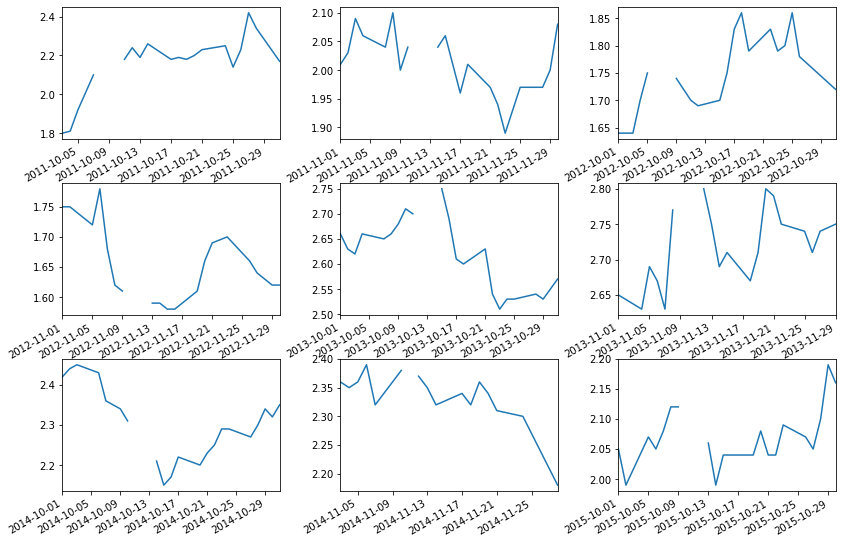

In [16]:
# Let's plot out the trend of treasury values first
fig, ax = plt.subplots(3, 3, figsize = (12, 9))
fig.tight_layout(pad=3)
data_since_2011.loc["2011-10"]["treasury_10 YR"].plot(ax = ax[0, 0])
data_since_2011.loc["2011-11"]["treasury_10 YR"].plot(ax = ax[0, 1])
data_since_2011.loc["2012-10"]["treasury_10 YR"].plot(ax = ax[0, 2])
data_since_2011.loc["2012-11"]["treasury_10 YR"].plot(ax = ax[1, 0])
data_since_2011.loc["2013-10"]["treasury_10 YR"].plot(ax = ax[1, 1])
data_since_2011.loc["2013-11"]["treasury_10 YR"].plot(ax = ax[1, 2])
data_since_2011.loc["2014-10"]["treasury_10 YR"].plot(ax = ax[2, 0])
data_since_2011.loc["2014-11"]["treasury_10 YR"].plot(ax = ax[2, 1])
data_since_2011.loc["2015-10"]["treasury_10 YR"].plot(ax = ax[2, 2])

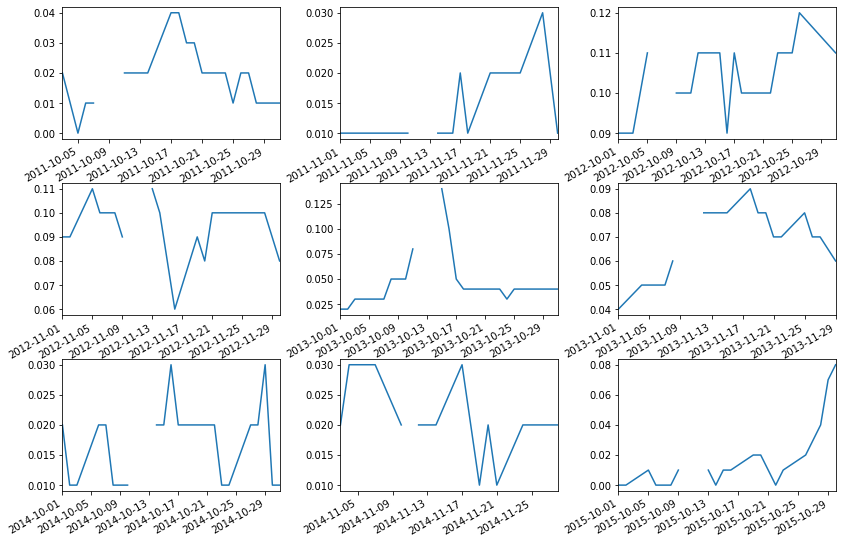

In [17]:
# Let's plot out the trend of treasury values first
fig, ax = plt.subplots(3, 3, figsize = (12, 9))
fig.tight_layout(pad=3)
data_since_2011.loc["2011-10"]["treasury_3 MO"].plot(ax = ax[0, 0])
data_since_2011.loc["2011-11"]["treasury_3 MO"].plot(ax = ax[0, 1])
data_since_2011.loc["2012-10"]["treasury_3 MO"].plot(ax = ax[0, 2])
data_since_2011.loc["2012-11"]["treasury_3 MO"].plot(ax = ax[1, 0])
data_since_2011.loc["2013-10"]["treasury_3 MO"].plot(ax = ax[1, 1])
data_since_2011.loc["2013-11"]["treasury_3 MO"].plot(ax = ax[1, 2])
data_since_2011.loc["2014-10"]["treasury_3 MO"].plot(ax = ax[2, 0])
data_since_2011.loc["2014-11"]["treasury_3 MO"].plot(ax = ax[2, 1])
data_since_2011.loc["2015-10"]["treasury_3 MO"].plot(ax = ax[2, 2])

Looking at the graphs, it seems that missing values are more often than averages of values before it and after it

In [18]:
# We can thus try to impute the NA value by taking the average of the value before the NA and after the NA
data_since_2011[data_since_2011["treasury_3 MO"].isna() == True].index

DatetimeIndex(['2019-11-11', '2019-10-14', '2018-11-12', '2018-10-08',
               '2017-10-09', '2016-11-11', '2016-10-10', '2015-11-11',
               '2015-10-12', '2014-11-11', '2014-10-13', '2013-11-11',
               '2013-10-14', '2012-11-12', '2012-10-08', '2011-11-11',
               '2011-10-10'],
              dtype='datetime64[ns]', freq=None)

In [19]:
# I will build a function to take fill the NA value with the average value of the value a day before and a day after
def average_imputation_NA(df, column, date_index):
    date_index_loc = df.index.get_loc(date_index)
    day_before_loc = date_index_loc + 1
    day_after_loc = date_index_loc - 1
    days_before = df.index[day_before_loc]
    days_after = df.index[day_after_loc]
    
    df.loc[date_index, column] = (df.loc[days_before, column] + df.loc[days_after, column]) / 2
    
    
    

In [20]:
# Impute NA values for 3-month treasury notes
for date_index in data_since_2011[data_since_2011["treasury_3 MO"].isna() == True].index:
    average_imputation_NA(data_since_2011, column="treasury_3 MO", date_index=date_index)
    
# Impute NA values for 10-year treasury notes
for date_index in data_since_2011[data_since_2011["treasury_10 YR"].isna() == True].index:
    average_imputation_NA(data_since_2011, column="treasury_10 YR", date_index=date_index)

In [21]:
data_since_2011.isna().sum()

aroon_Aroon Down                              0
aroon_Aroon Up                                0
bbands_close_Real Lower Band                  0
bbands_close_Real Middle Band                 0
bbands_close_Real Upper Band                  0
cci_CCI                                       0
macd_close_MACD_Hist                          0
obv_OBV                                       0
rsi_close_RSI                                 0
sma_close_100_SMA                            19
sma_close_20_SMA                              0
stoch_SlowD                                   0
stock_time_series_adjusted_adjusted_close     0
crudeoil_Open                                 4
dollar_Open                                   4
fedfund_Open                                  6
gold_Open                                     5
treasury_3 MO                                 0
treasury_10 YR                                0
dtype: int64

In [22]:
# Now let's take a look at sma_close_100_SMA
data_since_2011[data_since_2011["sma_close_100_SMA"].isna() == True]["sma_close_100_SMA"]

2011-01-28   NaN
2011-01-27   NaN
2011-01-26   NaN
2011-01-25   NaN
2011-01-24   NaN
2011-01-21   NaN
2011-01-20   NaN
2011-01-19   NaN
2011-01-18   NaN
2011-01-14   NaN
2011-01-13   NaN
2011-01-12   NaN
2011-01-11   NaN
2011-01-10   NaN
2011-01-07   NaN
2011-01-06   NaN
2011-01-05   NaN
2011-01-04   NaN
2011-01-03   NaN
Name: sma_close_100_SMA, dtype: float64

It seems that the NA values for SMA 100-day closing values are concentreated between 2011-01-03 and 2011-01-28.
We can remove this month to get rid of the NA values

In [23]:
data_since_2011_02 = data_since_2011.loc[:"2011-02"]

In [24]:
data_since_2011_02.isna().sum()

aroon_Aroon Down                             0
aroon_Aroon Up                               0
bbands_close_Real Lower Band                 0
bbands_close_Real Middle Band                0
bbands_close_Real Upper Band                 0
cci_CCI                                      0
macd_close_MACD_Hist                         0
obv_OBV                                      0
rsi_close_RSI                                0
sma_close_100_SMA                            0
sma_close_20_SMA                             0
stoch_SlowD                                  0
stock_time_series_adjusted_adjusted_close    0
crudeoil_Open                                4
dollar_Open                                  4
fedfund_Open                                 6
gold_Open                                    5
treasury_3 MO                                0
treasury_10 YR                               0
dtype: int64

In [25]:
# Now let's take a look at crudeoil_open
data_since_2011_02[data_since_2011_02["crudeoil_Open"].isna() == True]["crudeoil_Open"]

2020-02-13   NaN
2018-11-28   NaN
2017-11-09   NaN
2016-06-23   NaN
Name: crudeoil_Open, dtype: float64

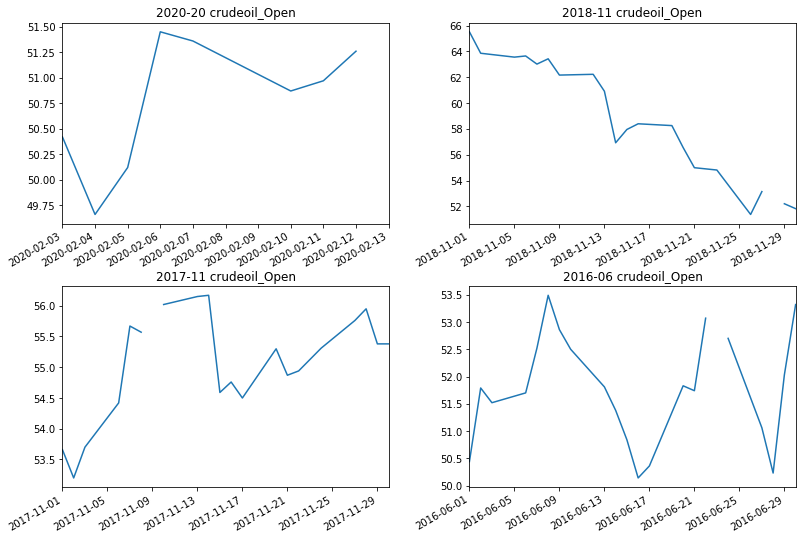

In [26]:
# Let's make some graphs again to visualize the trajectory of crude oil open price in these months
fig, ax = plt.subplots(2, 2, figsize = (12, 9))
fig.tight_layout(pad=5)
data_since_2011_02.loc["2020-02"]["crudeoil_Open"].plot(ax = ax[0, 0], title="2020-20 crudeoil_Open")
data_since_2011_02.loc["2018-11"]["crudeoil_Open"].plot(ax = ax[0, 1], title="2018-11 crudeoil_Open")
data_since_2011_02.loc["2017-11"]["crudeoil_Open"].plot(ax = ax[1, 0], title="2017-11 crudeoil_Open")
data_since_2011_02.loc["2016-06"]["crudeoil_Open"].plot(ax = ax[1, 1], title="2016-06 crudeoil_Open")


In [27]:
# Let's take a look at dollar_open as well
data_since_2011_02[data_since_2011_02["dollar_Open"].isna() == True]["dollar_Open"]

2016-01-06   NaN
2014-09-26   NaN
2014-06-13   NaN
2011-12-05   NaN
Name: dollar_Open, dtype: float64

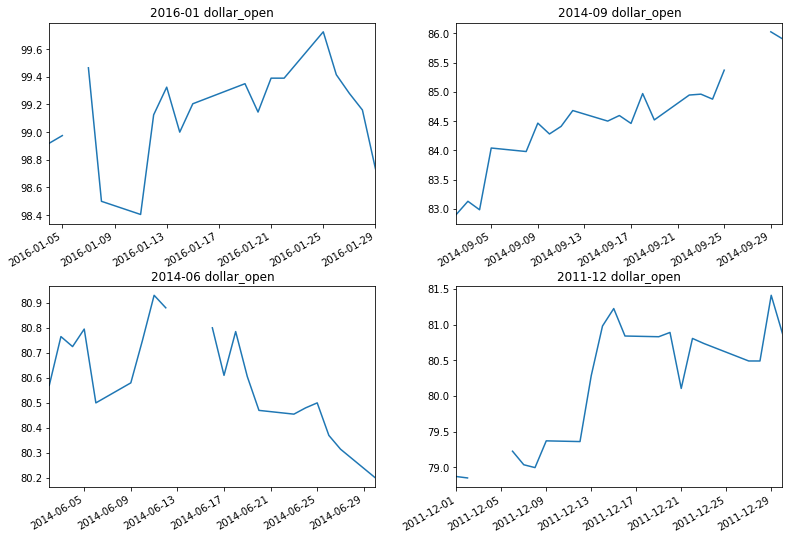

In [28]:
# Let's make some graphs again to visualize the trajectory of dollar open price in these months
fig, ax = plt.subplots(2, 2, figsize = (12, 9))
fig.tight_layout(pad=5)
data_since_2011_02.loc["2016-01"]["dollar_Open"].plot(ax = ax[0, 0], title="2016-01 dollar_open")
data_since_2011_02.loc["2014-09"]["dollar_Open"].plot(ax = ax[0, 1], title="2014-09 dollar_open")
data_since_2011_02.loc["2014-06"]["dollar_Open"].plot(ax = ax[1, 0], title="2014-06 dollar_open")
data_since_2011_02.loc["2011-12"]["dollar_Open"].plot(ax = ax[1, 1], title="2011-12 dollar_open")


In [29]:
# Let's take a look at fedfund_open as well
data_since_2011_02[data_since_2011_02["fedfund_Open"].isna() == True]["fedfund_Open"]

2019-12-31   NaN
2019-01-02   NaN
2018-12-31   NaN
2018-01-02   NaN
2017-01-03   NaN
2015-11-27   NaN
Name: fedfund_Open, dtype: float64

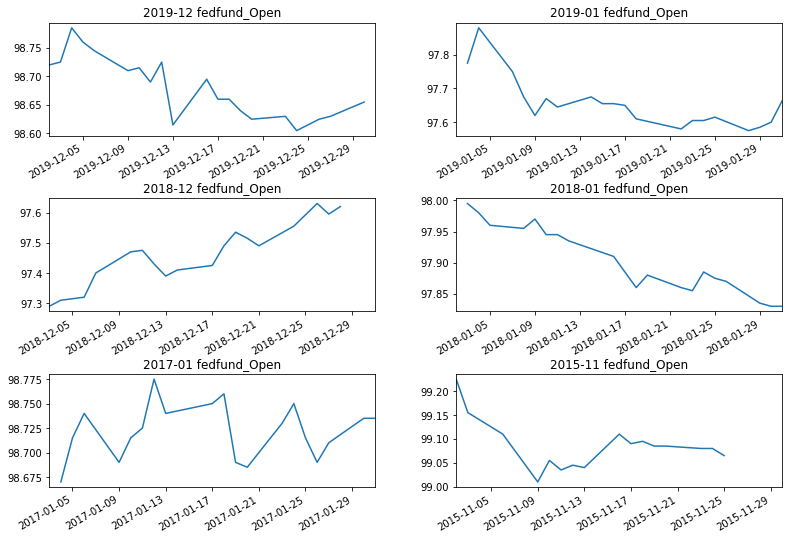

In [30]:
# Let's make some graphs again to visualize the trajectory of fedfund open price in these months
fig, ax = plt.subplots(3, 2, figsize = (12, 9))
fig.tight_layout(pad=5)
data_since_2011_02.loc["2019-12"]["fedfund_Open"].plot(ax = ax[0, 0], title="2019-12 fedfund_Open")
data_since_2011_02.loc["2019-01"]["fedfund_Open"].plot(ax = ax[0, 1], title="2019-01 fedfund_Open")
data_since_2011_02.loc["2018-12"]["fedfund_Open"].plot(ax = ax[1, 0], title="2018-12 fedfund_Open")
data_since_2011_02.loc["2018-01"]["fedfund_Open"].plot(ax = ax[1, 1], title="2018-01 fedfund_Open")
data_since_2011_02.loc["2017-01"]["fedfund_Open"].plot(ax = ax[2, 0], title="2017-01 fedfund_Open")
data_since_2011_02.loc["2015-11"]["fedfund_Open"].plot(ax = ax[2, 1], title="2015-11 fedfund_Open")

In [31]:
# Let's take a look at gold_open as well
data_since_2011_02[data_since_2011_02["gold_Open"].isna() == True]["gold_Open"]

2019-12-30   NaN
2018-05-29   NaN
2012-03-12   NaN
2011-04-11   NaN
2011-03-22   NaN
Name: gold_Open, dtype: float64

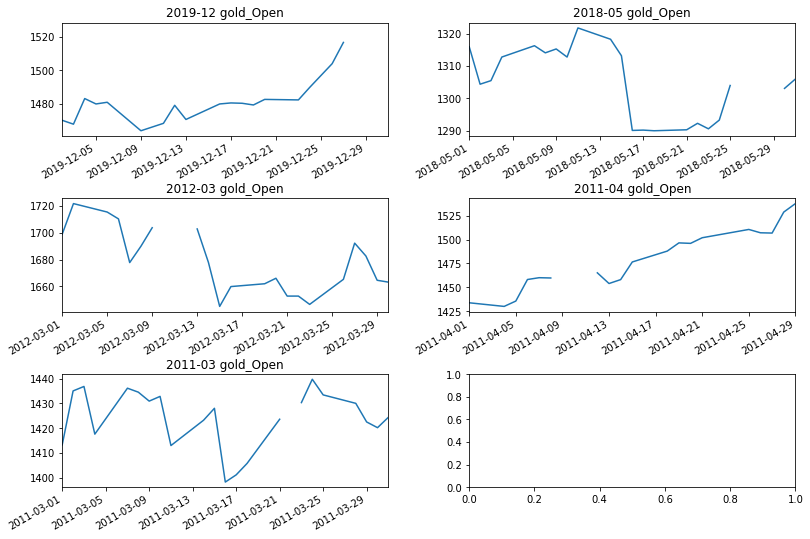

In [32]:
# Let's make some graphs again to visualize the trajectory of gold open price in these months
fig, ax = plt.subplots(3, 2, figsize = (12, 9))
fig.tight_layout(pad=5)
data_since_2011_02.loc["2019-12"]["gold_Open"].plot(ax = ax[0, 0], title="2019-12 gold_Open")
data_since_2011_02.loc["2018-05"]["gold_Open"].plot(ax = ax[0, 1], title="2018-05 gold_Open")
data_since_2011_02.loc["2012-03"]["gold_Open"].plot(ax = ax[1, 0], title="2012-03 gold_Open")
data_since_2011_02.loc["2011-04"]["gold_Open"].plot(ax = ax[1, 1], title="2011-04 gold_Open")
data_since_2011_02.loc["2011-03"]["gold_Open"].plot(ax = ax[2, 0], title="2011-03 gold_Open")


**For all of these variables, it seems that the previous practice of taking the mean is still valid**

In [33]:
# Let's create a list to store those variables to be operated
var_to_op = ["crudeoil_Open", "dollar_Open", "fedfund_Open", "gold_Open"]

for var in var_to_op:
    for date_index in data_since_2011_02[data_since_2011_02[var].isna() == True].index:
        average_imputation_NA(data_since_2011_02, column=var, date_index=date_index)

In [34]:
data_since_2011_02.isna().sum()

aroon_Aroon Down                             0
aroon_Aroon Up                               0
bbands_close_Real Lower Band                 0
bbands_close_Real Middle Band                0
bbands_close_Real Upper Band                 0
cci_CCI                                      0
macd_close_MACD_Hist                         0
obv_OBV                                      0
rsi_close_RSI                                0
sma_close_100_SMA                            0
sma_close_20_SMA                             0
stoch_SlowD                                  0
stock_time_series_adjusted_adjusted_close    0
crudeoil_Open                                0
dollar_Open                                  0
fedfund_Open                                 2
gold_Open                                    0
treasury_3 MO                                0
treasury_10 YR                               0
dtype: int64

In [35]:
data_since_2011_02[data_since_2011_02["fedfund_Open"].isna() == True]["fedfund_Open"]

2019-01-02   NaN
2018-12-31   NaN
Name: fedfund_Open, dtype: float64

In [36]:
data_since_2011_02.loc["2019-01"].tail()

,aroon_Aroon Down,aroon_Aroon Up,bbands_close_Real Lower Band,bbands_close_Real Middle Band,bbands_close_Real Upper Band,cci_CCI,macd_close_MACD_Hist,obv_OBV,rsi_close_RSI,sma_close_100_SMA,sma_close_20_SMA,stoch_SlowD,stock_time_series_adjusted_adjusted_close,crudeoil_Open,dollar_Open,fedfund_Open,gold_Open,treasury_3 MO,treasury_10 YR
2019-01-08,68.0,8.0,216.5847,231.8800,247.1753,126.0658,1.4169,44661050.0,50.9757,252.6155,231.8800,80.1976,231.1782,51.75,94.810,97.675,1290.4,2.46,2.73
2019-01-07,72.0,12.0,216.3279,232.1970,248.0661,96.4681,0.9900,41114401.0,48.4028,252.8644,232.1970,75.1837,228.9538,51.33,95.080,97.750,1290.2,2.45,2.70
2019-01-04,76.0,16.0,215.6119,232.9155,250.2191,34.7774,0.5363,37408387.0,46.4005,253.1193,232.9155,80.1536,227.2488,50.15,95.330,97.880,1301.0,2.42,2.67
2019-01-03,80.0,20.0,215.1534,233.7525,252.3516,-46.3399,0.0276,32308299.0,36.6847,253.4014,233.7525,83.6782,219.9877,49.31,95.805,97.775,1293.5,2.41,2.56
2019-01-02,84.0,24.0,214.7914,235.3580,255.9246,-18.2539,0.0528,35638325.0,41.9113,253.7754,235.3580,82.4770,225.3674,48.84,95.080,NaN,1288.1,2.42,2.66


In [37]:
data_since_2011_02.loc["2018-12"].head()

,aroon_Aroon Down,aroon_Aroon Up,bbands_close_Real Lower Band,bbands_close_Real Middle Band,bbands_close_Real Upper Band,cci_CCI,macd_close_MACD_Hist,obv_OBV,rsi_close_RSI,sma_close_100_SMA,sma_close_20_SMA,stoch_SlowD,stock_time_series_adjusted_adjusted_close,crudeoil_Open,dollar_Open,fedfund_Open,gold_Open,treasury_3 MO,treasury_10 YR
2018-12-31,88.0,28.0,214.6833,236.5325,258.3817,-24.5490,-0.3854,30746996.0,41.6583,254.0978,236.5325,68.3295,225.1910,47.87,95.525,NaN,1284.0,2.45,2.69
2018-12-28,92.0,32.0,215.0452,237.6325,260.2198,-36.0027,-0.9490,24063039.0,38.8405,254.4234,237.6325,45.4314,223.1822,48.62,95.470,97.620,1278.0,2.40,2.72
2018-12-27,96.0,36.0,215.8858,238.8610,261.8362,-69.8008,-1.4765,31499392.0,39.0885,254.7622,238.8610,22.8642,223.4664,49.23,95.745,97.595,1270.1,2.41,2.77
2018-12-26,100.0,40.0,217.1388,239.7870,262.4352,-104.2448,-2.1439,21921032.0,36.3562,255.0883,239.7870,10.1570,221.4086,45.66,95.545,97.630,1273.5,2.44,2.81
2018-12-24,100.0,44.0,218.9177,240.7795,262.6413,-165.4883,-2.7408,10323067.0,18.8418,255.4227,240.7795,7.6310,210.7473,48.01,95.825,97.555,1260.7,2.45,2.74


In [38]:
# It seems that two consecutive values are NA in this case. I decide to equate them with the value before and after,
# since there are no better way to tackle it
data_since_2011_02.loc["2019-01-02", "fedfund_Open"] = data_since_2011_02.loc["2019-01-03", "fedfund_Open"][0]
data_since_2011_02.loc["2018-12-31", "fedfund_Open"] = data_since_2011_02.loc["2018-12-28", "fedfund_Open"][0]

In [39]:
data_since_2011_02.isna().sum()

aroon_Aroon Down                             0
aroon_Aroon Up                               0
bbands_close_Real Lower Band                 0
bbands_close_Real Middle Band                0
bbands_close_Real Upper Band                 0
cci_CCI                                      0
macd_close_MACD_Hist                         0
obv_OBV                                      0
rsi_close_RSI                                0
sma_close_100_SMA                            0
sma_close_20_SMA                             0
stoch_SlowD                                  0
stock_time_series_adjusted_adjusted_close    0
crudeoil_Open                                0
dollar_Open                                  0
fedfund_Open                                 0
gold_Open                                    0
treasury_3 MO                                0
treasury_10 YR                               0
dtype: int64

## AWESOME! Now we have removed all NA values!!

In [41]:
# Let's save the dataframe into a separate csv file
data_since_2011_02.to_csv("SP_500_no_NA.csv")